In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.io
import os
from util import *
import lspn



In [2]:
def visualize_problem( data ):
    fig = plt.figure(figsize=(15, 15));
    ax = plt.subplot(141)
    plt.title('sigma_t')
    field = data["sigma_t"].T
    t = plt.imshow(field, interpolation="nearest", cmap='jet', origin='lower', vmin=np.min(field), vmax=np.max(field))
    # add color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(t, cax=cax)
    ax = plt.subplot(142)
    plt.title('sigma_a')
    field = data["sigma_a"].T
    t = plt.imshow(field, interpolation="nearest", cmap='jet', origin='lower', vmin=np.min(field), vmax=np.max(field))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(t, cax=cax)
    ax = plt.subplot(143)
    plt.title('sigma_s')
    field = data["sigma_s"].T
    t = plt.imshow(field, interpolation="nearest", cmap='jet', origin='lower', vmin=np.min(field), vmax=np.max(field))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(t, cax=cax)
    ax = plt.subplot(144)
    plt.title('q')
    field = data["q"].T
    t = plt.imshow(field, interpolation="nearest", cmap='jet', origin='lower', vmin=np.min(field), vmax=np.max(field))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(t, cax=cax)
    plt.show()
    
def get_coefficient_field(x, pnb):
    u0 = np.zeros( (pnb.domain.res_x, pnb.domain.res_y) )
    for voxel_i in range(pnb.domain.res_x):
        for voxel_j in range(pnb.domain.res_y):
            i = pnb.get_global_index(voxel_i, voxel_j, 0)
            u0[voxel_i, voxel_j] = x[i]
    return u0
    
def visualize_solution_vector(x, pnb):

    u0 = get_coefficient_field(x, pnb)

    u0 = np.abs(u0)

    vmin = 1.0e-8
    vmax = np.max(u0)*1.0
    
    if vmin >= vmax:
        vmin = vmax
    print("vmin={} vmax={}".format(vmin, vmax))

    if vmin==vmax:
        plt.imshow(u0.T, interpolation="nearest", cmap='jet', vmin=vmin, vmax=vmax, origin='lower')
    else:
        plt.imshow(u0.T, interpolation="nearest", cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax), origin='lower')
def plot_u( u, grid, voxel, vmin=None, vmax=None ):
    #ax = plt.subplot(subplotcode)
    ax = plt.subplot2grid(grid, voxel)
    #u_abs = np.abs(u)
    if vmin is None:
        vmin = max(1.0e-8, np.min(u) )
    if vmax is None:
        vmax = max(1.0e-8, np.max(u) )

    print("vmin={} vmax={}".format(vmin, vmax))
    t = plt.imshow(u, interpolation="nearest", cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax), origin='lower')

    # add color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(t, cax=cax)
def plot_u2( u, grid, voxel, vmin=None, vmax=None ):
    #ax = plt.subplot(subplotcode)
    ax = plt.subplot2grid(grid, voxel)
    #u_abs = np.abs(u)
    #vmin = max(1.0e-8, np.min(u) )
    #vmax = max(1.0e-8, np.max(u) )
    if vmin is None:
        vmin = np.min(u)
    if vmax is None:
        vmax = np.max(u)
    
    print("vmin={} vmax={}".format(vmin, vmax))
    t = plt.imshow(u, interpolation="nearest", cmap='jet', vmin=vmin, vmax=vmax, origin='lower')

    # add color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(t, cax=cax)

In [5]:
id = "checkerboard_blur10.0"
#id = "checkerboard_blur10.0_noterm1"
#id = "checkerboard_blur10.0_fade"
#id = "checkerboard_blur10.0_fade_noterm1"
#id = "checkerboard"
data_solution = lspn.load_pn_solution("C:/projects/epfl/epfl17/python/sopn/solution_{}.mat".format(id))

A_real = data_solution["A_real"]
x_real = data_solution["x_real"]
b_real = data_solution["b_real"]
pnb = data_solution["pnb"]

loading PN solution from C:/projects/epfl/epfl17/python/sopn/solution_checkerboard_blur10.0.mat


C:\Users\dk402_000\Anaconda3\lib\site-packages\scipy\io\matlab\mio.py:136: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


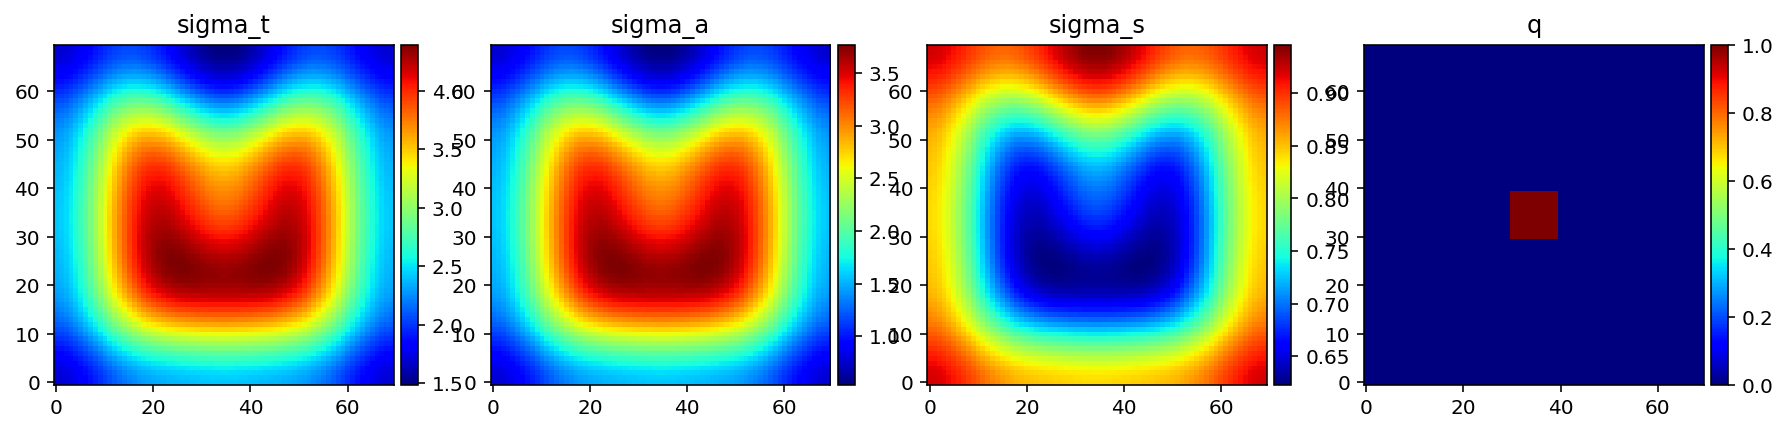

vmin=1e-08 vmax=0.2852960133561409
vmin=-5.34617124119959e-07 vmax=0.2852960133561409


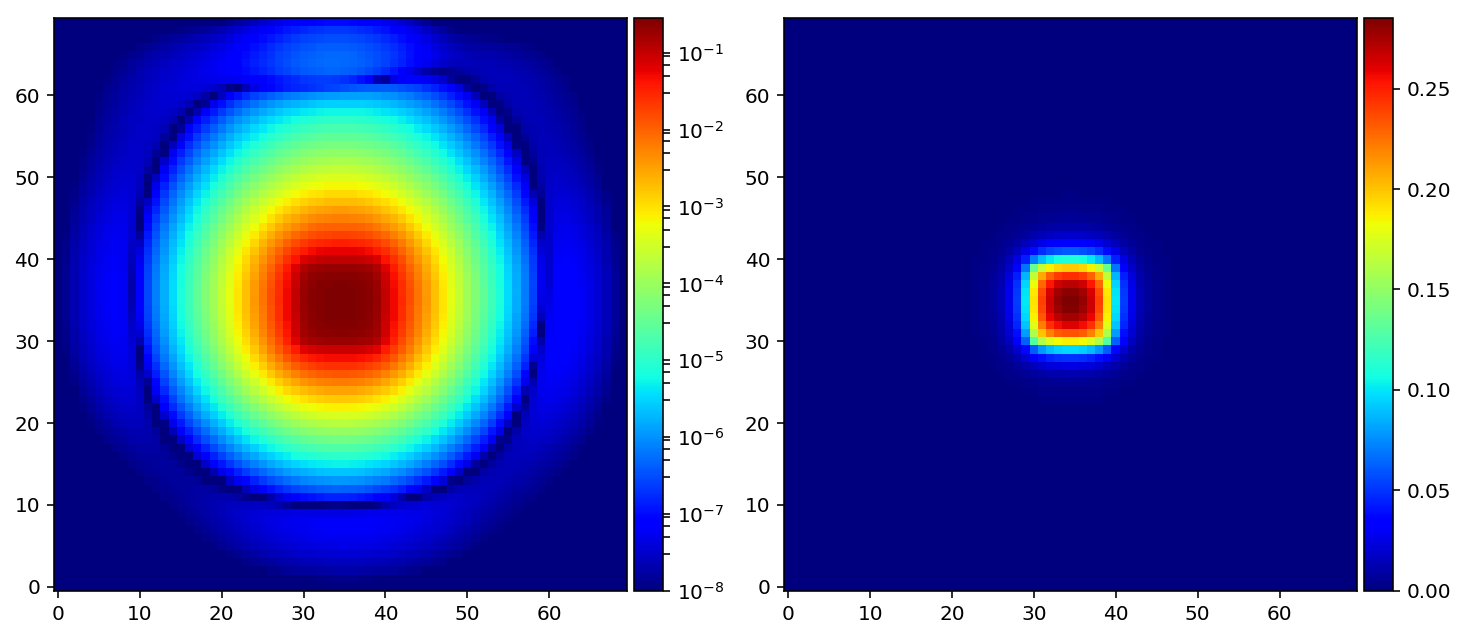

In [6]:
visualize_problem(data_solution)

fig = plt.figure(figsize=(12,12));
u = get_coefficient_field(x_real, pnb )
plot_u(np.abs(u.T), (1,2), (0,0))
plot_u2(u.T, (1,2), (0,1))
plt.show()
#visualize_solution_vector(x_real, pnb)

vmin=1e-08 vmax=2.3064500437907753
vmin=-1.3554699377298274 vmax=2.3064500437907753


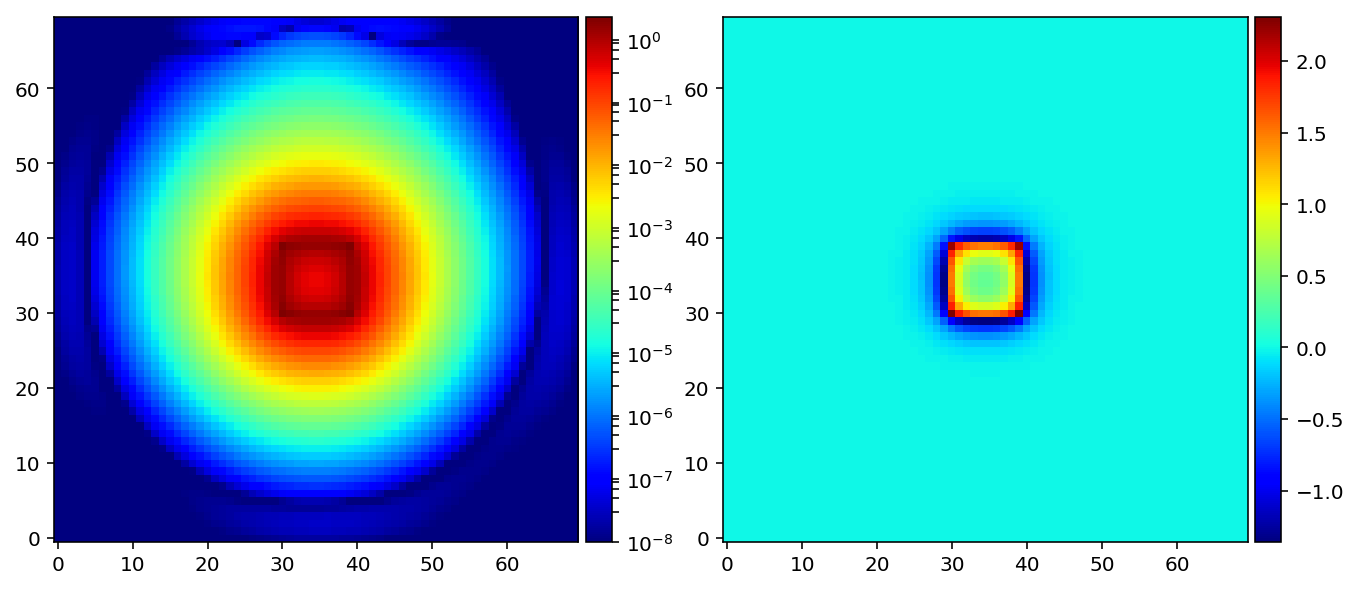

vmin=1e-08 vmax=0.02575164601975283
vmin=-0.02575164601975283 vmax=0.015407325479694667


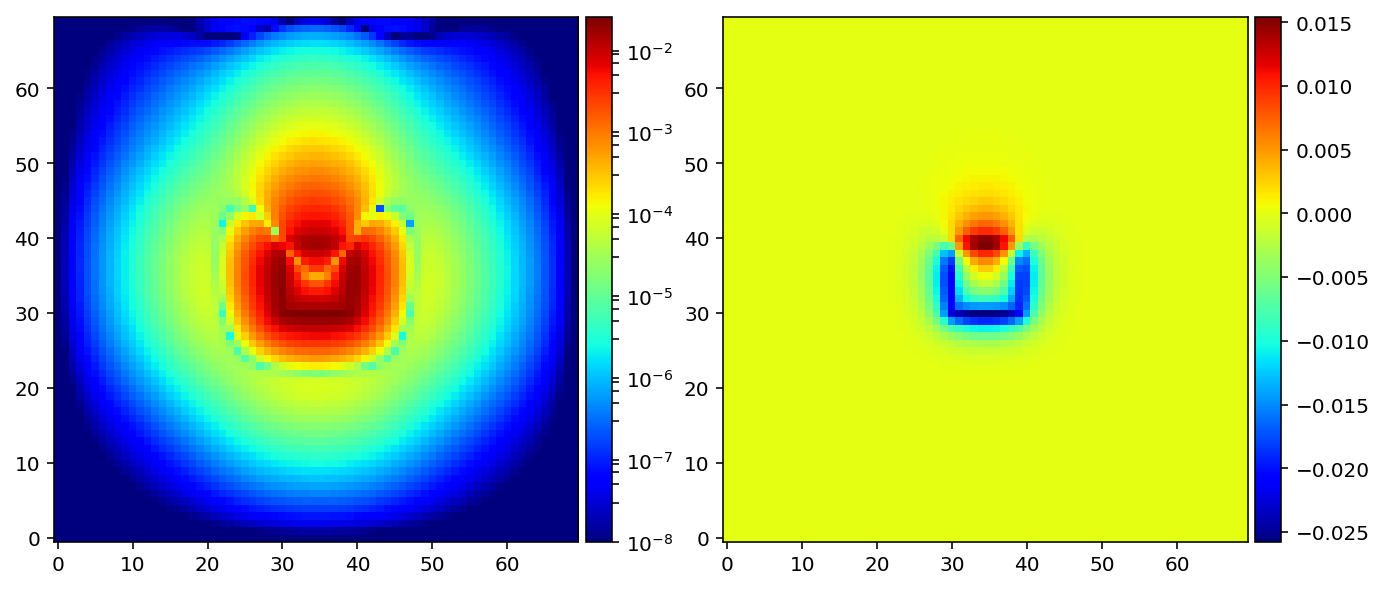

vmin=1e-08 vmax=4.268593180059355
vmin=-1.4758028962611388e-06 vmax=4.268593180059355


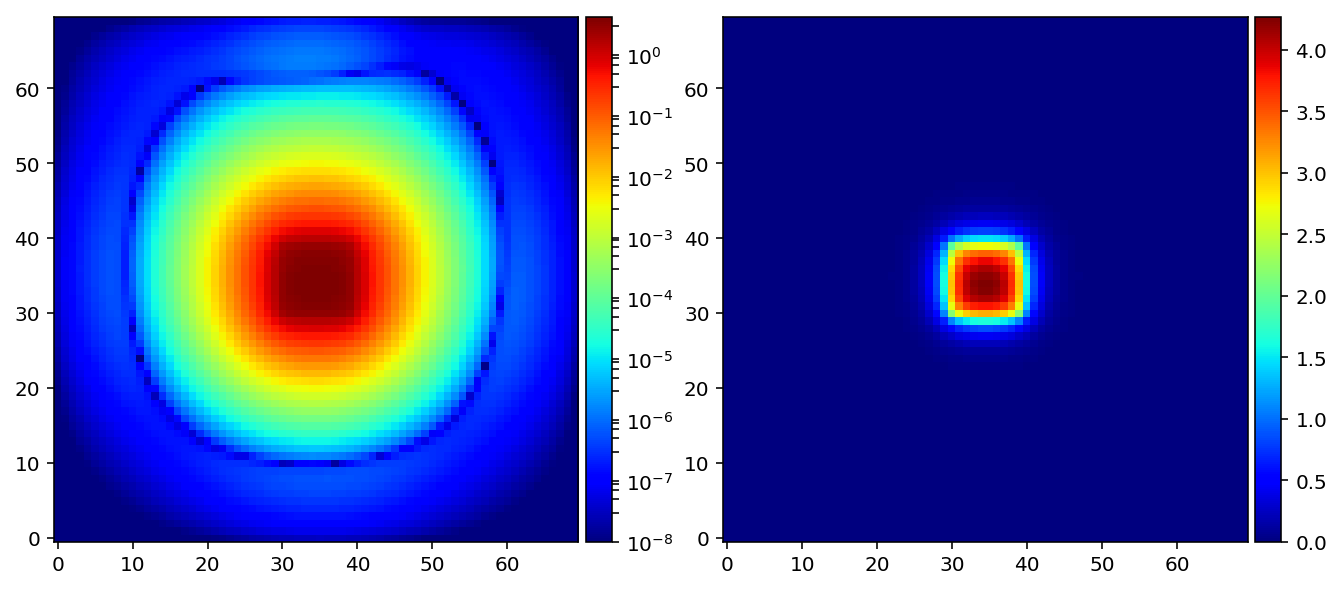

vmin=1e-08 vmax=1e-08
vmin=0.0 vmax=0.0


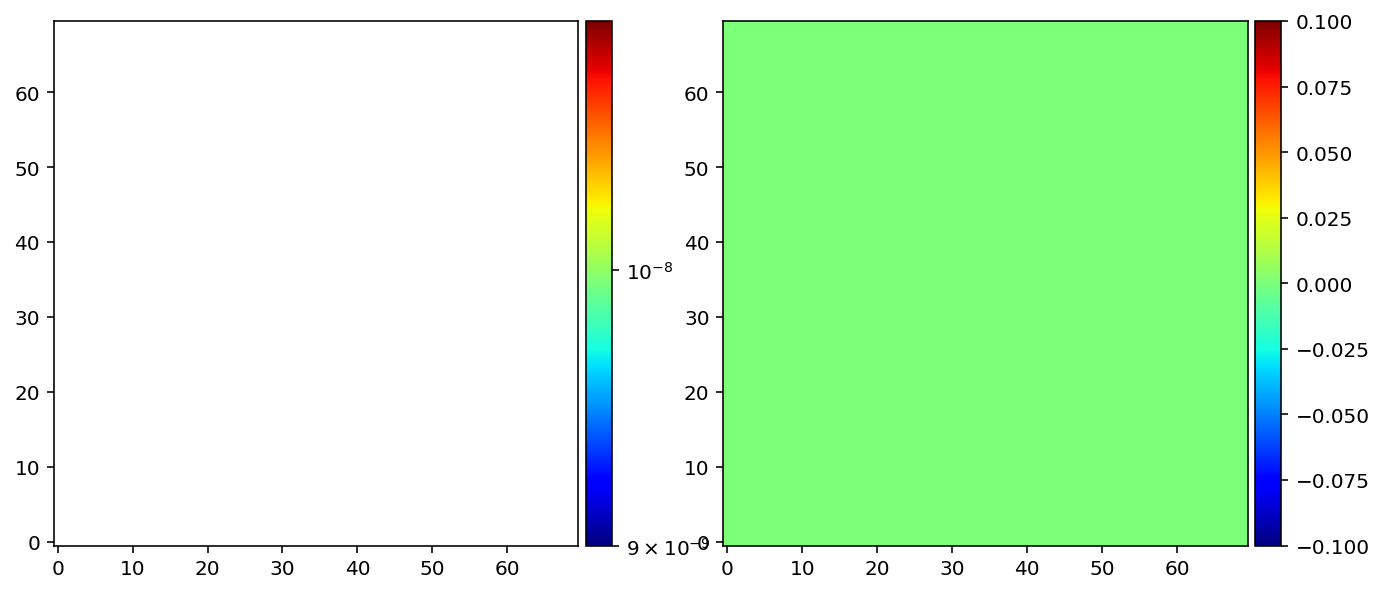

vmin=1e-08 vmax=0.7501587704231617
vmin=-0.7501587704231617 vmax=8.21006964741132e-07


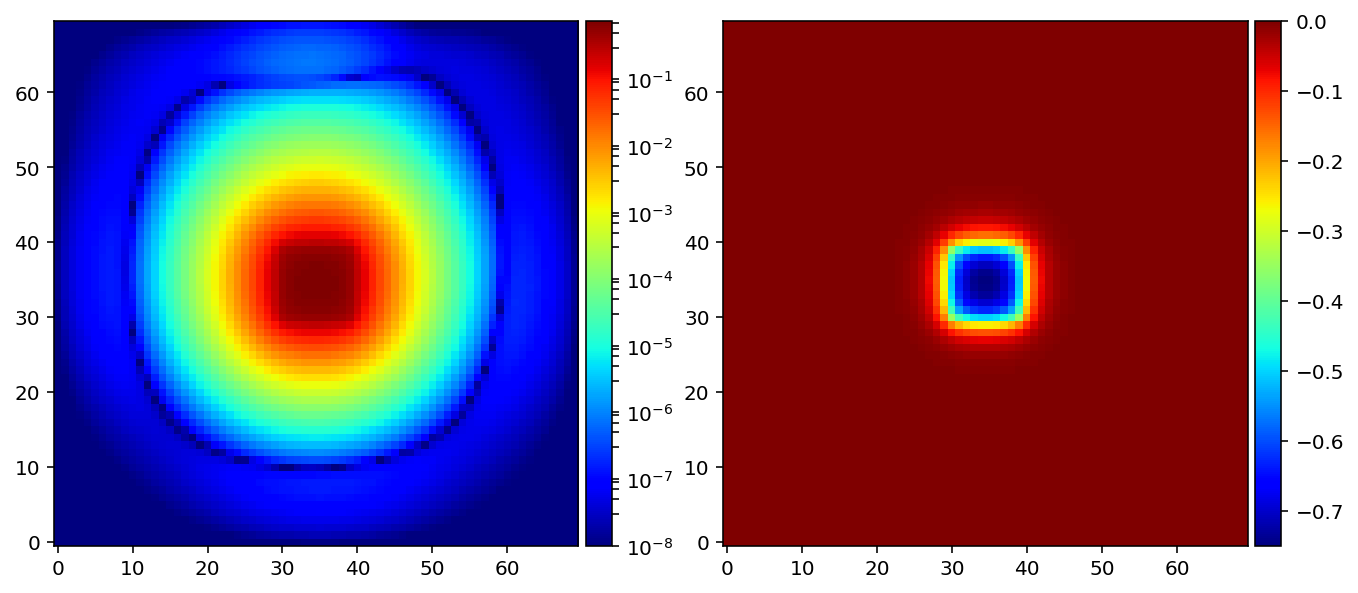

In [5]:
grid = (1, 2)
figsize = (11,11)

for term_index in range(5):
    fig = plt.figure(figsize=figsize);
    #A = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/debug_terms/system_{}_term{}.mat".format(id, term_index))["A"]
    A = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/debug_terms/debug_A_term{}.mat".format(term_index))["A"]
    u = get_coefficient_field(A.dot(x_real), pnb )
    plot_u(np.abs(u.T), grid, (0,0))
    plot_u2(u.T, grid, (0,1))
    plt.show()


In [28]:
# terms
data = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/debug_terms/data_terms.mat")


vmin=1e-08 vmax=1.4968544673830346
vmin=-0.7863861909240404 vmax=1.4968544673830346


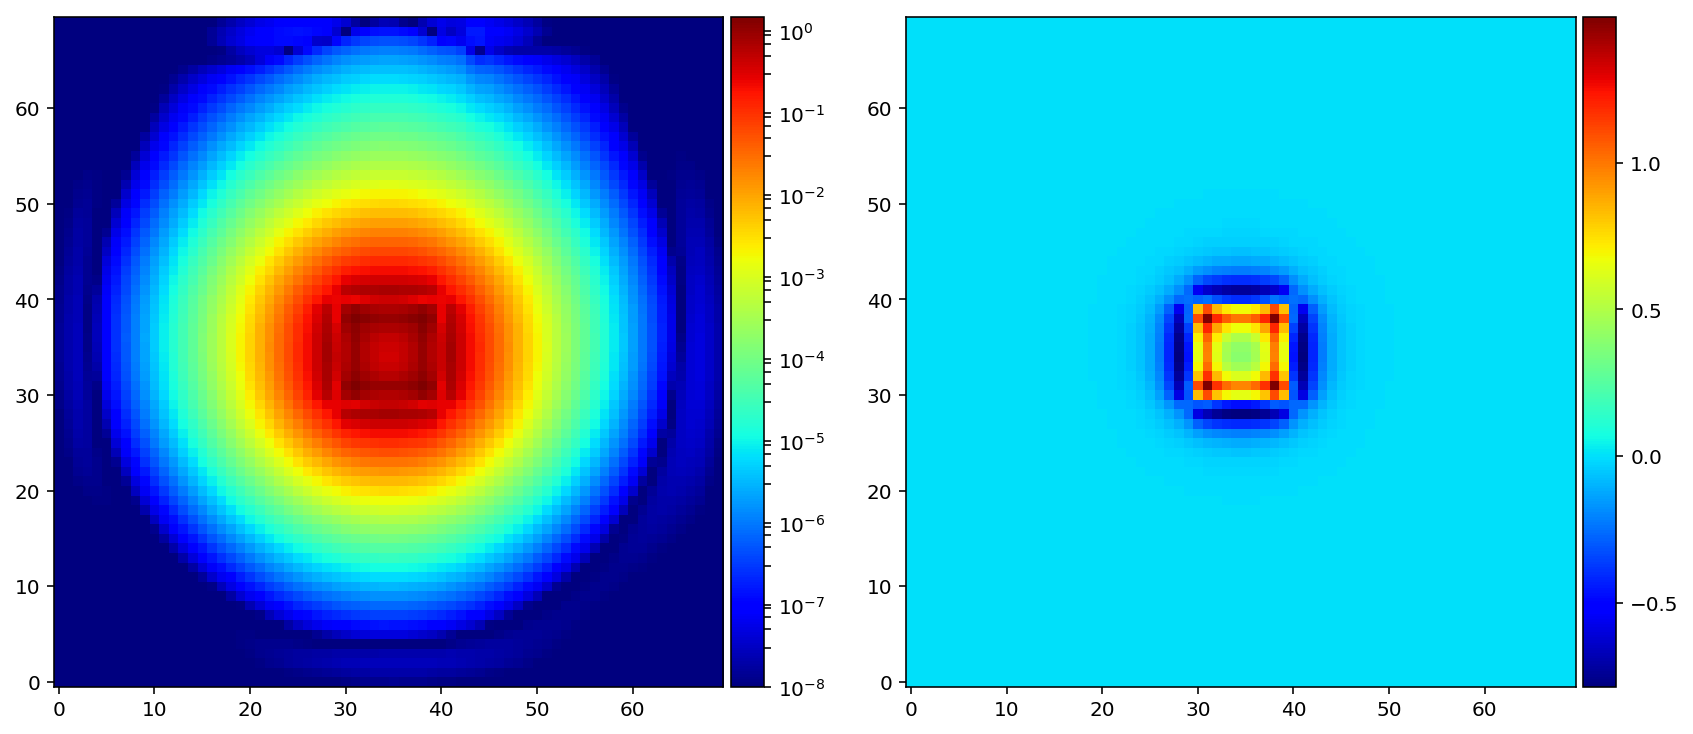

vmin=1e-08 vmax=0.025743568149477012
vmin=-0.025743568149477012 vmax=0.01541460076833208


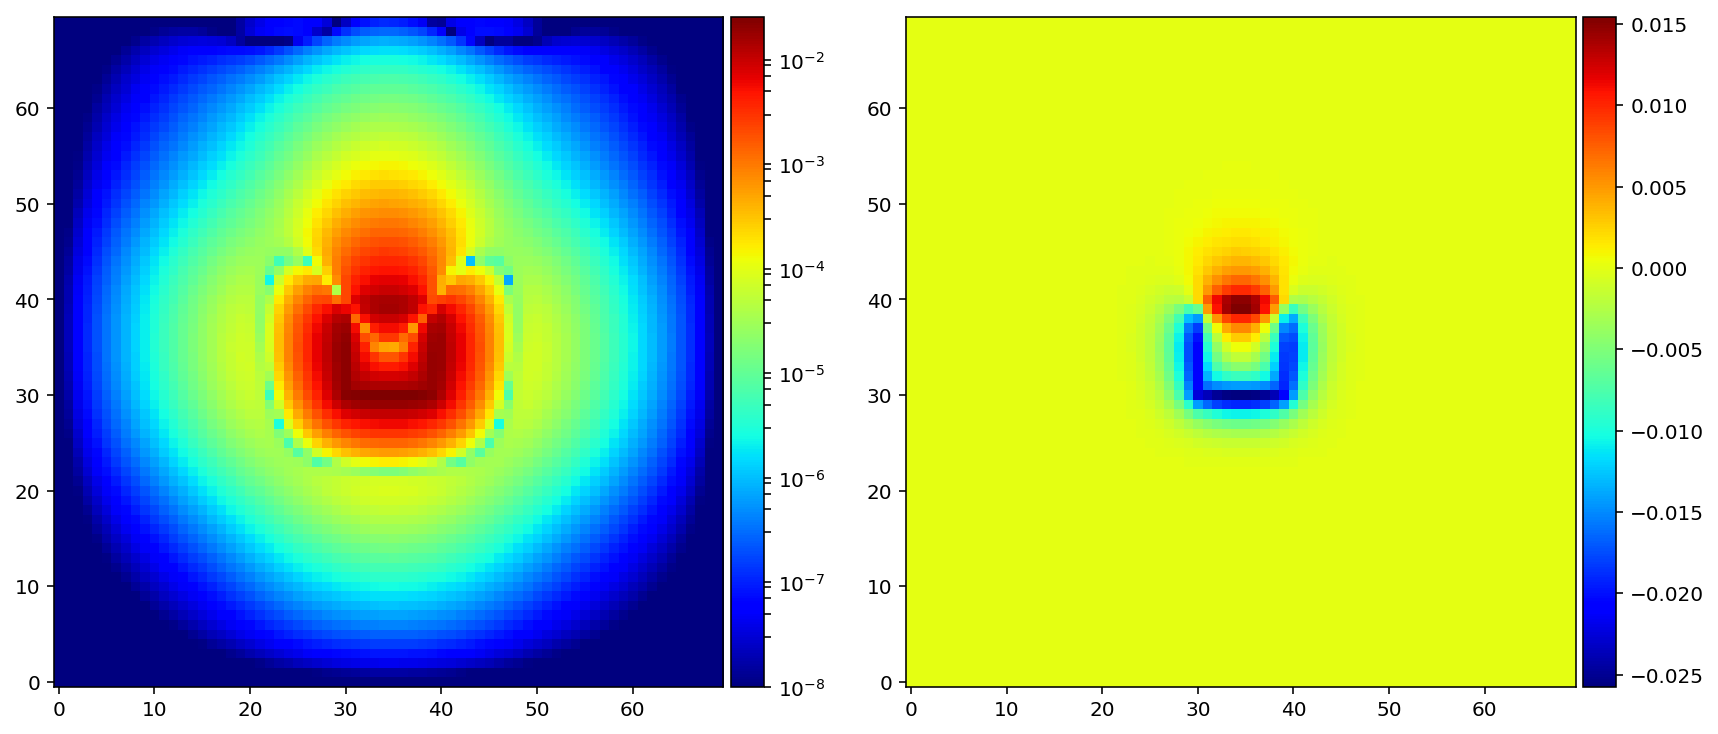

vmin=1e-08 vmax=4.2684374587333735
vmin=-1.2265562584092058e-06 vmax=4.2684374587333735


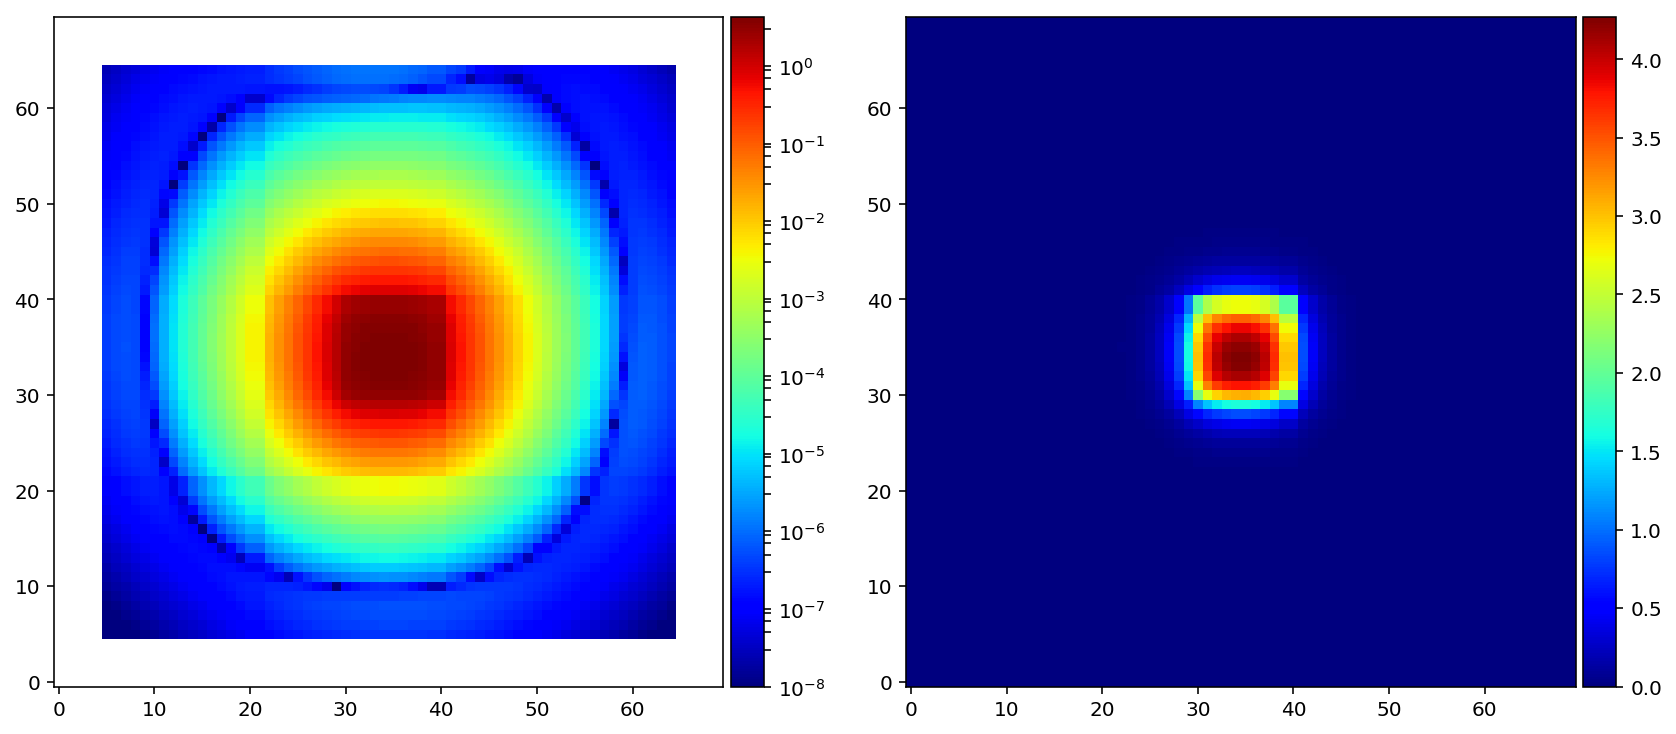

vmin=1e-08 vmax=1e-08
vmin=-1.7236855778828995e-17 vmax=1.7334952782032884e-17


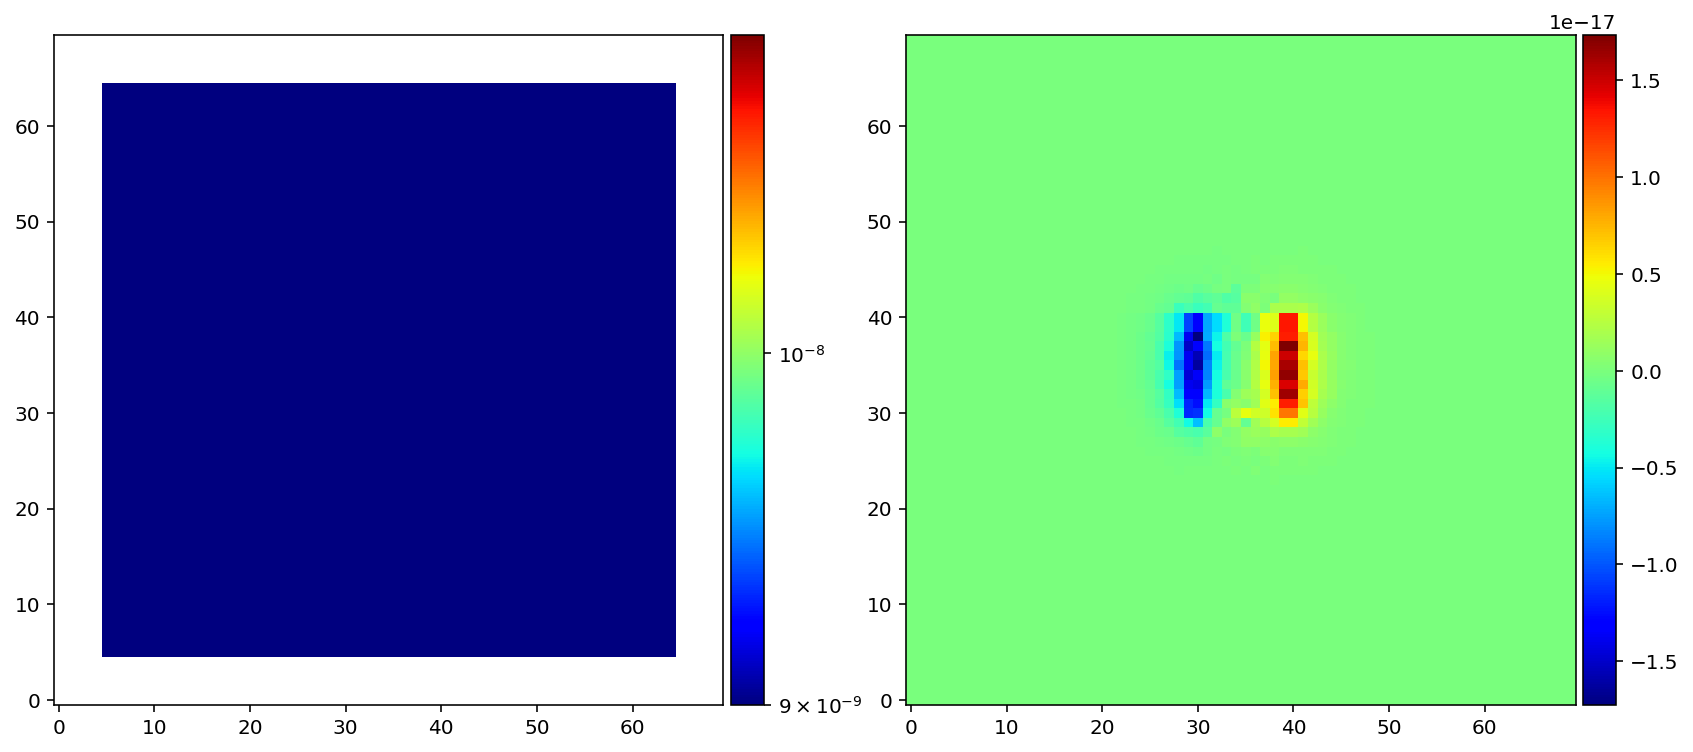

vmin=1e-08 vmax=0.7501423643667026
vmin=-0.7501423643667026 vmax=6.823403676258886e-07


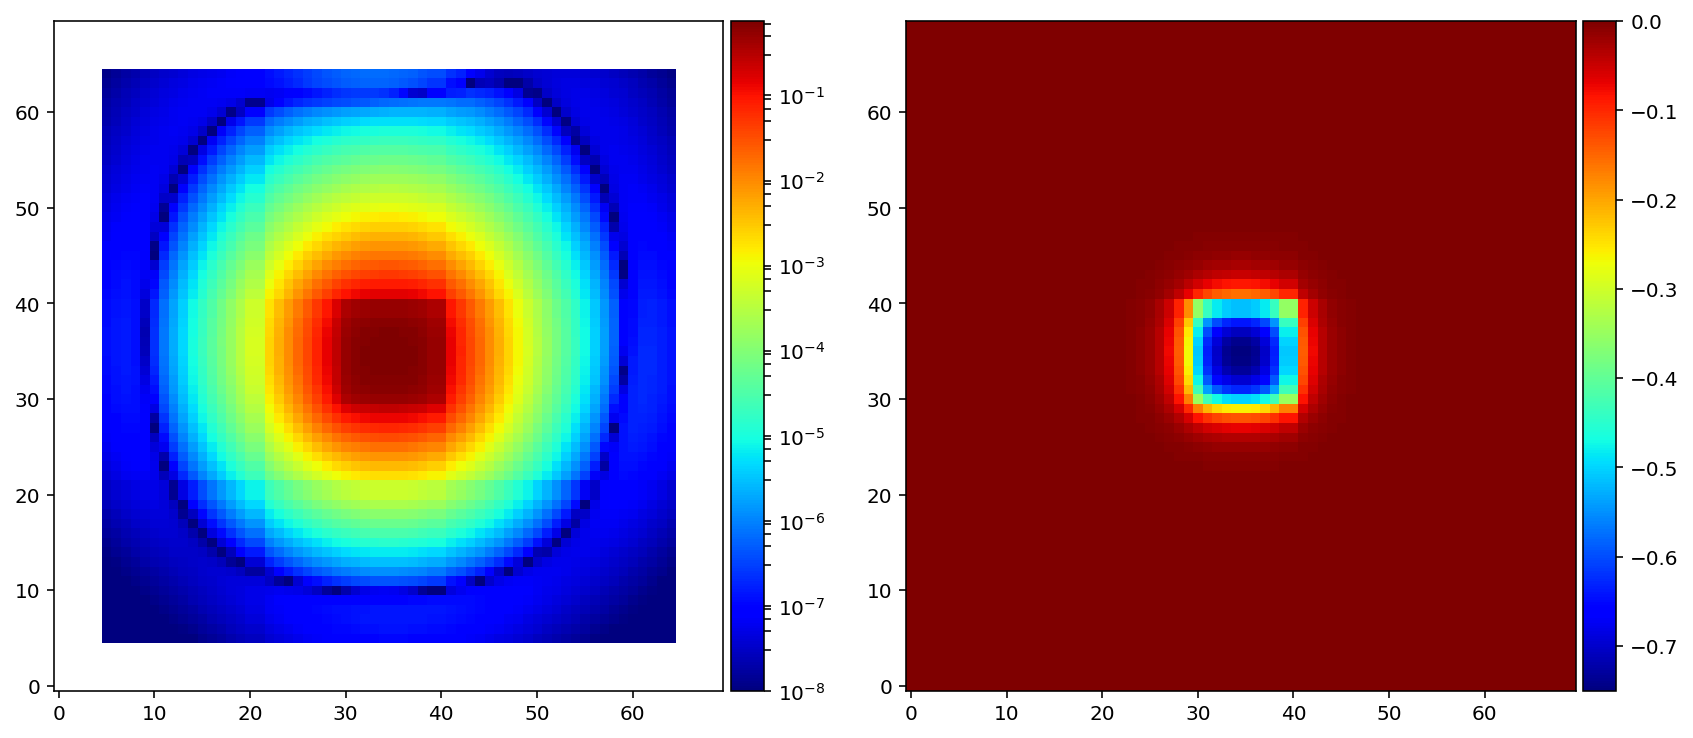

In [8]:
for term_index in range(5):
    x_real_term = data["x_term{}".format(term_index)].reshape(data["x_term{}".format(term_index)].shape[0])

    grid = (1,2)
    u = get_coefficient_field(x_real_term, pnb )
    fig = plt.figure(figsize=(14,14));
    plot_u(np.abs(u.T), grid, (0,0))
    plot_u2(u.T, grid, (0,1))
    plt.show()

    #u = get_coefficient_field(A.dot(x_real), pnb )
    #plot_u(np.clip(u.T, 1.0e-8, np.max(u.T)), grid, (0,1))



vmin=1e-08 vmax=2.3064500437907753
vmin=1e-08 vmax=1.4968544673830346


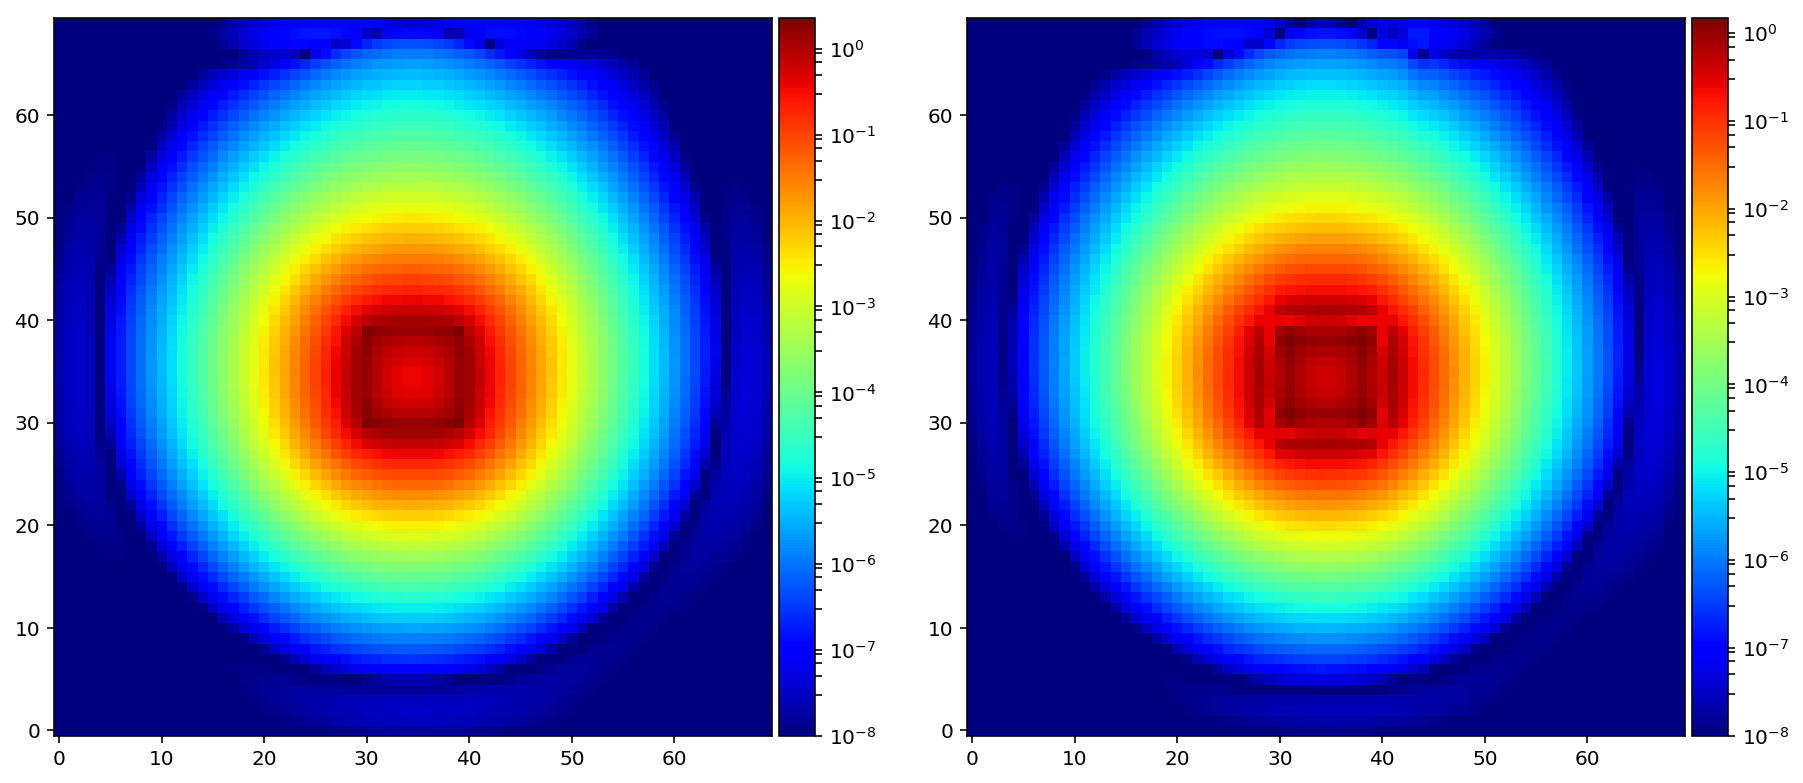

vmin=1e-08 vmax=0.02575164601975283
vmin=1e-08 vmax=0.025743568149477012


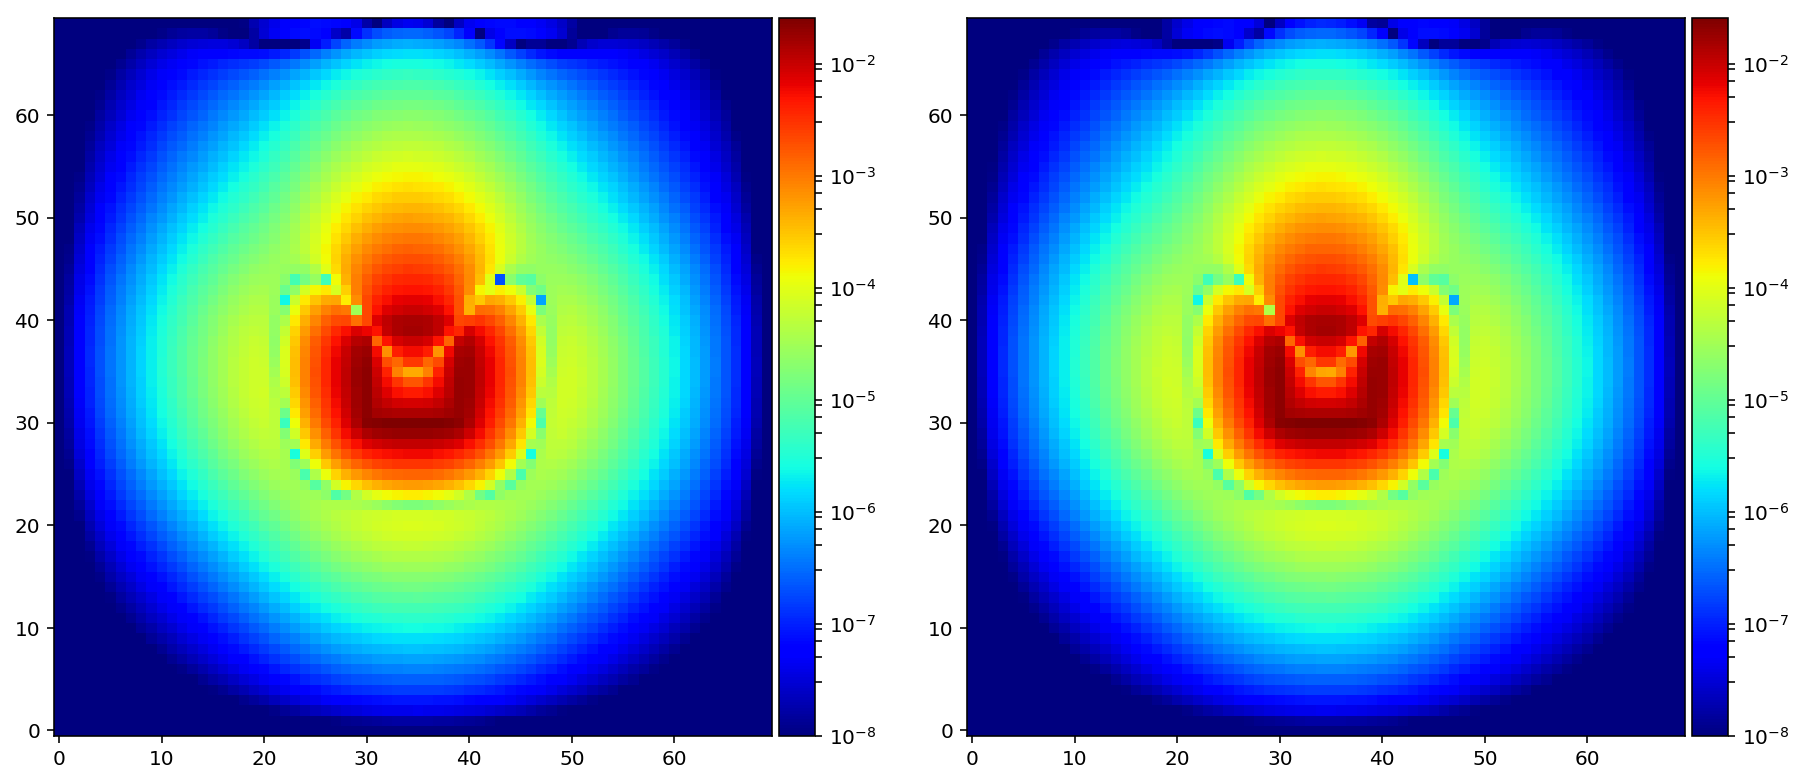

vmin=1e-08 vmax=4.268593180059355
vmin=1e-08 vmax=4.2684374587333735


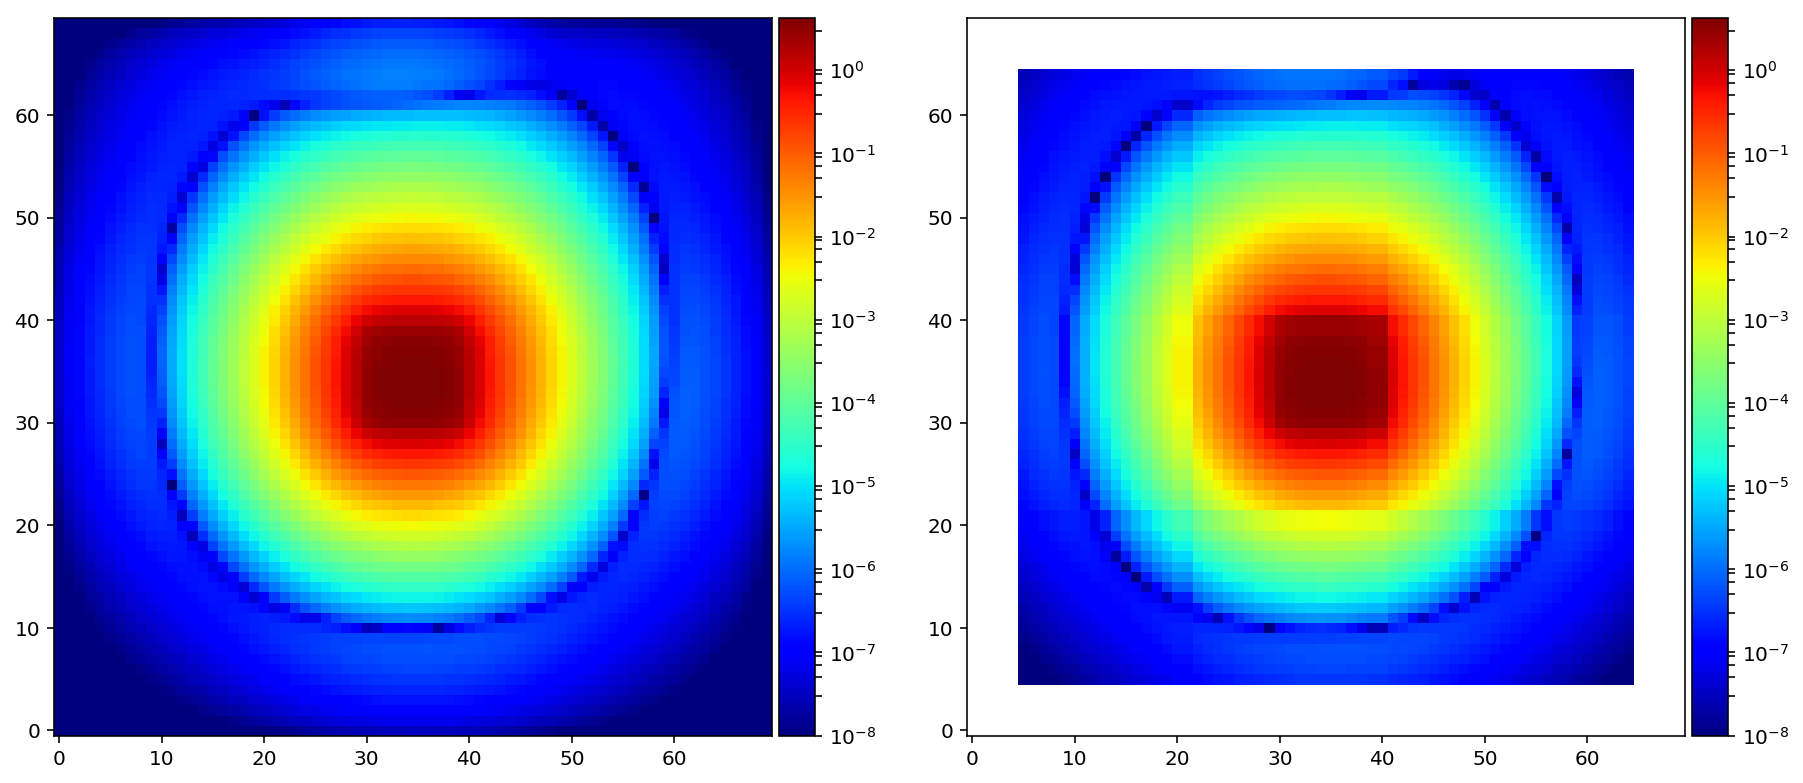

vmin=1e-08 vmax=1e-08
vmin=1e-08 vmax=1e-08


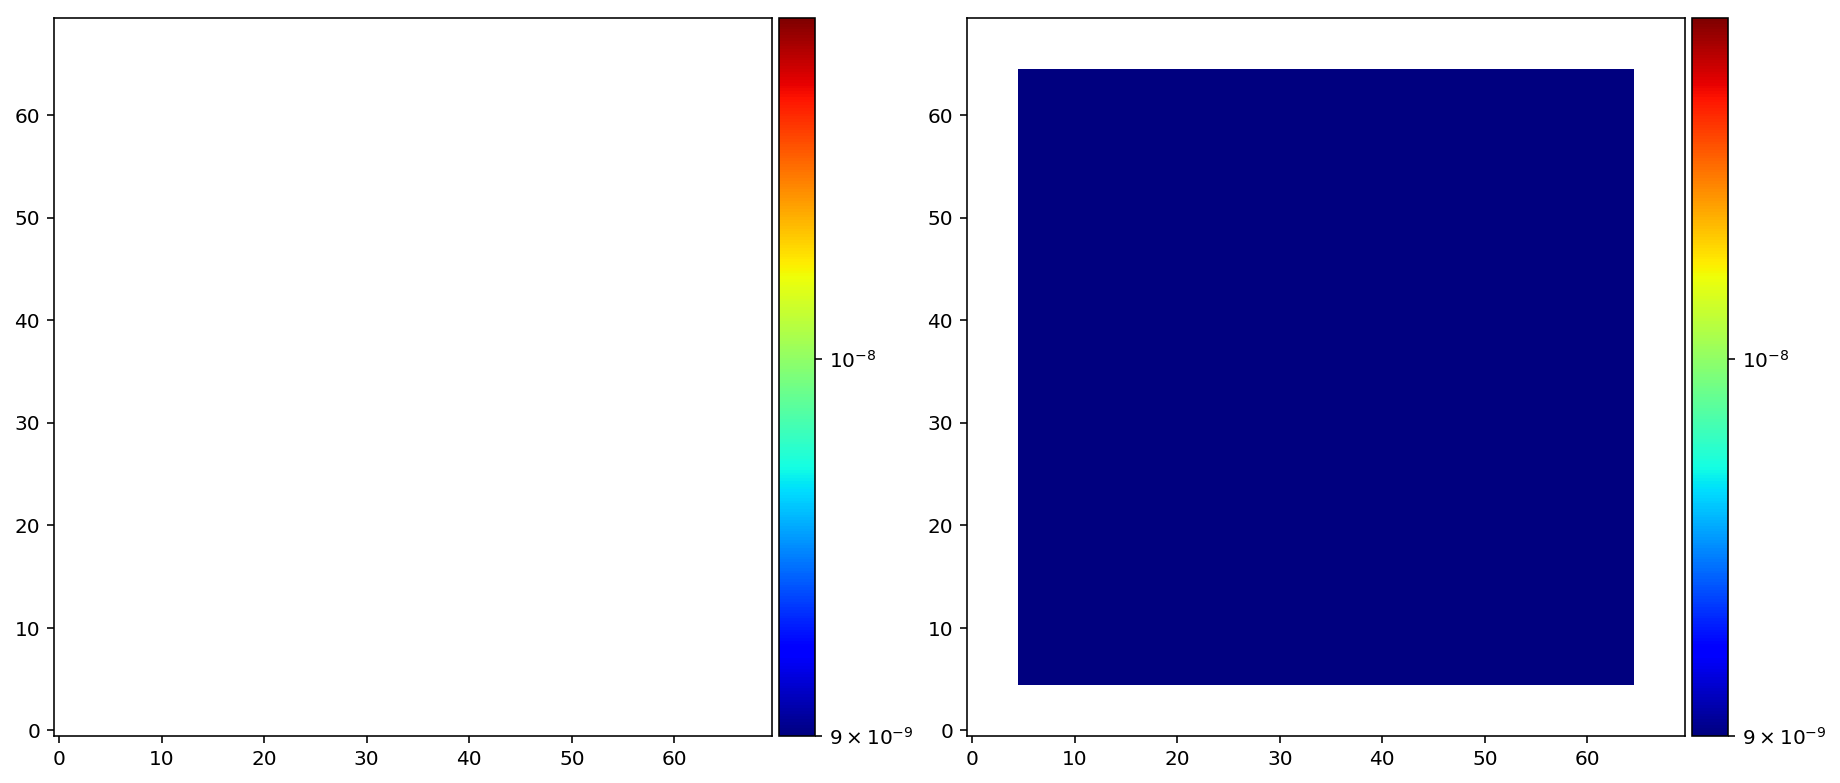

vmin=1e-08 vmax=0.7501587704231617
vmin=1e-08 vmax=0.7501423643667026


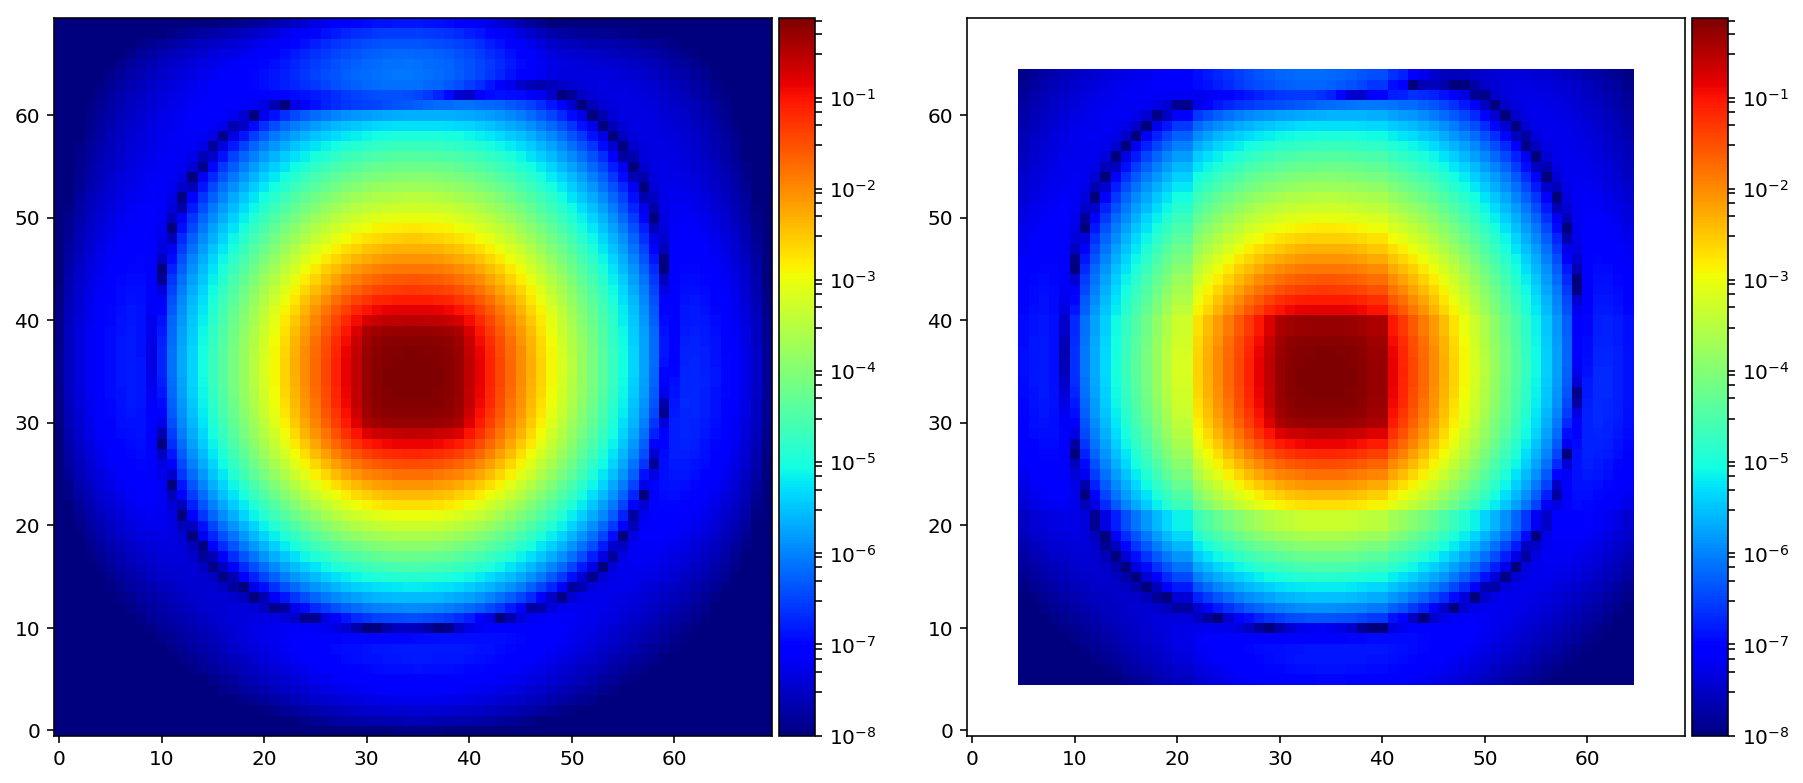

In [31]:
for term_index in range(5):
    fig = plt.figure(figsize=(15,15));
    #A_term = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/debug_terms/system_{}_term{}.mat".format(id, term_index))["A"]
    A_term = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/debug_terms/debug_A_term{}.mat".format(term_index))["A"]
    u = get_coefficient_field(A_term.dot(x_real), pnb )
    #print(u[40,35])
    plot_u(np.abs(u.T), grid, (0,0))
    #plot_u2(u.T, grid, (0,0))
    #plot_u(np.abs(u), grid, (0,0))
    
    x_real_term = data["x_term{}".format(term_index)].reshape(data["x_term{}".format(term_index)].shape[0])
    u = get_coefficient_field(x_real_term, pnb )
    #u[40,35] = 0.0
    #print(u[40,35])
    
    #plot_u(np.abs(u), grid, (0,1))
    plot_u(np.abs(u.T), grid, (0,1))
    #plot_u2(u.T, grid, (0,1))

    plt.show()

In [42]:
id = "checkerboard_blur10.0_fade_noterm1"
data_solution_noterm1 = lspn.load_pn_solution("C:/projects/epfl/epfl17/python/sopn/solution_{}.mat".format(id))

id = "checkerboard_blur10.0_fade"
data_solution_withterm1 = lspn.load_pn_solution("C:/projects/epfl/epfl17/python/sopn/solution_{}.mat".format(id))

loading PN solution from C:/projects/epfl/epfl17/python/sopn/solution_checkerboard_blur10.0_fade_noterm1.mat


C:\Users\dk402_000\Anaconda3\lib\site-packages\scipy\io\matlab\mio.py:136: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


loading PN solution from C:/projects/epfl/epfl17/python/sopn/solution_checkerboard_blur10.0_fade.mat


vmin=1e-08 vmax=0.28529601332717064
vmin=1e-08 vmax=0.28512760747433824
vmin=-1e-06 vmax=1e-06
vmin=-1e-06 vmax=1e-06


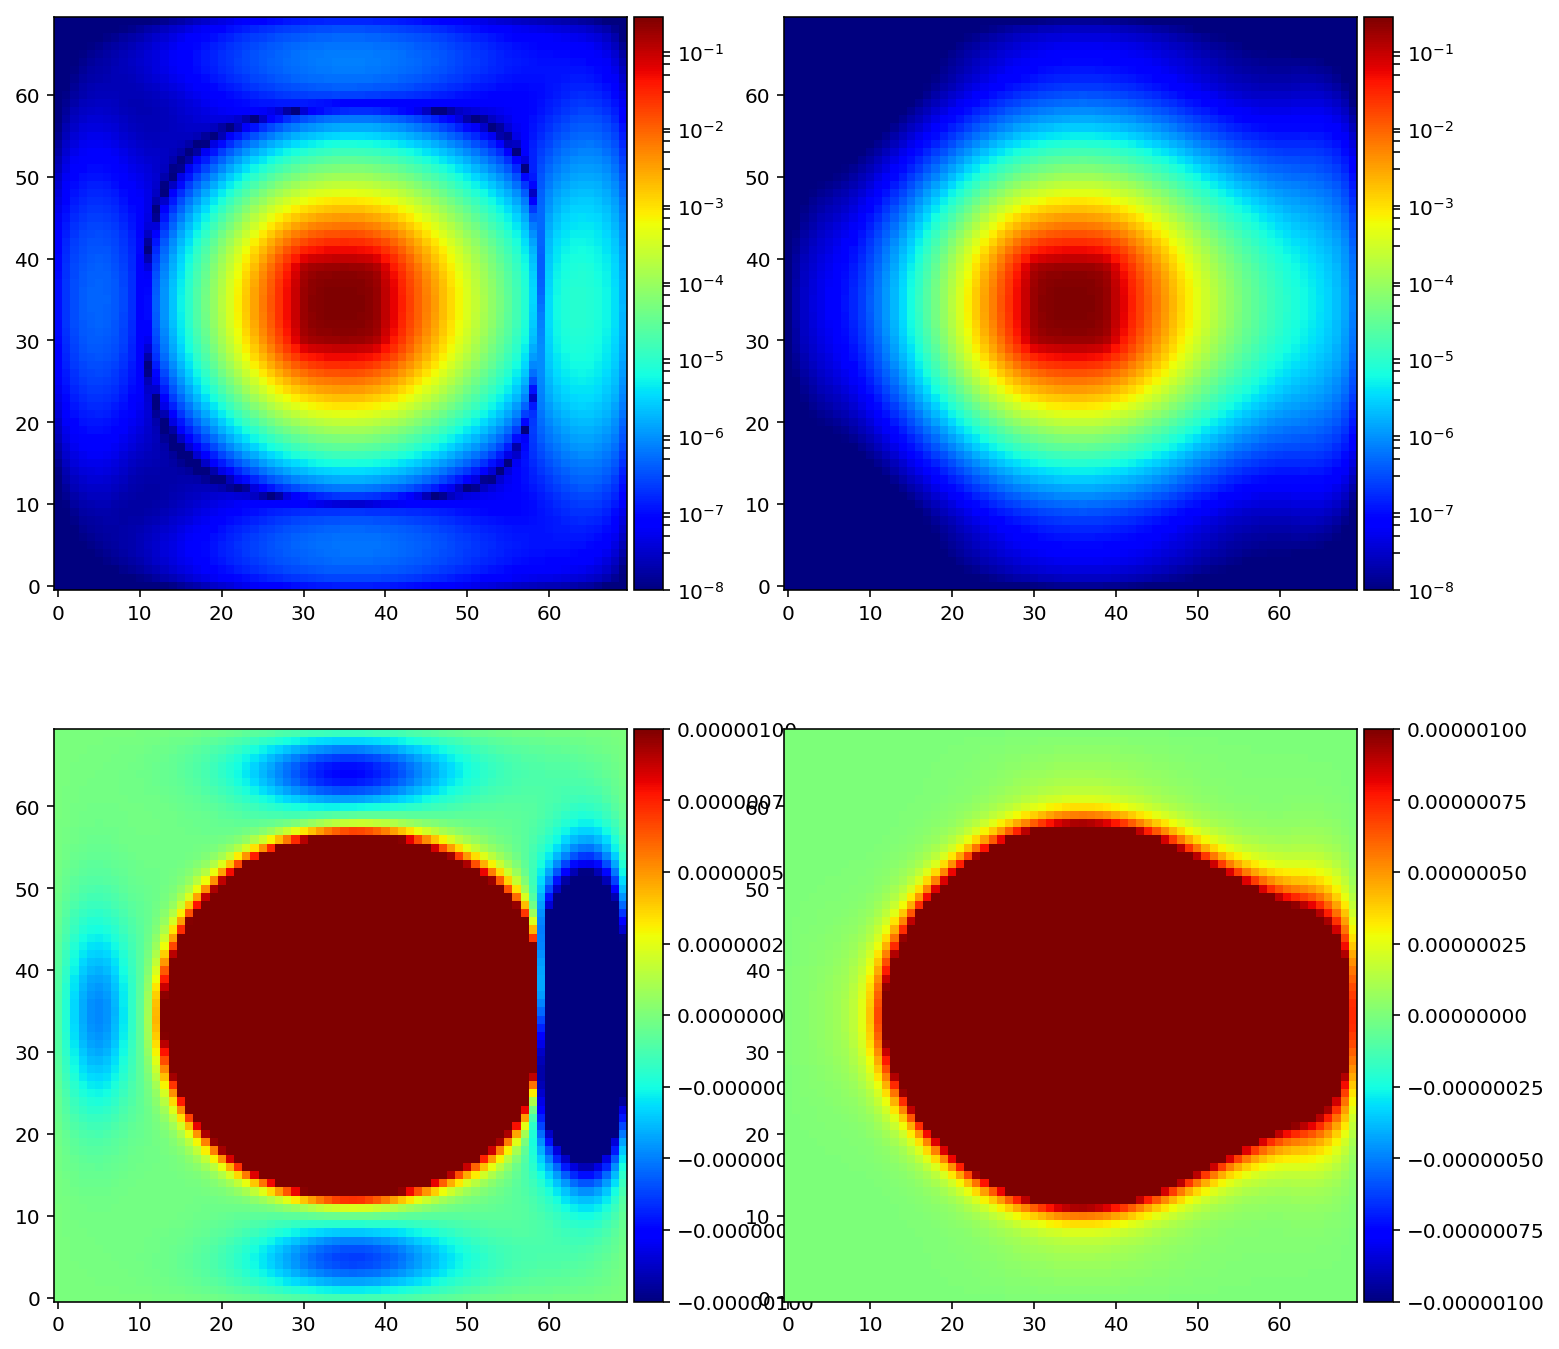

In [43]:
pnb = data_solution_withterm1["pnb"]

fig = plt.figure(figsize=(12,12));
u = get_coefficient_field(data_solution_withterm1["x_real"], pnb )
u_noterm1 = get_coefficient_field(data_solution_noterm1["x_real"], pnb )
plot_u(np.abs(u), (2,2), (0,0))
plot_u(np.abs(u_noterm1), (2,2), (0,1))
plot_u2(u, (2,2), (1,0), vmin=-0.000001, vmax=0.000001)
plot_u2(u_noterm1, (2,2), (1,1), vmin=-0.000001, vmax=0.000001)
plt.show()

C:\Users\dk402_000\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


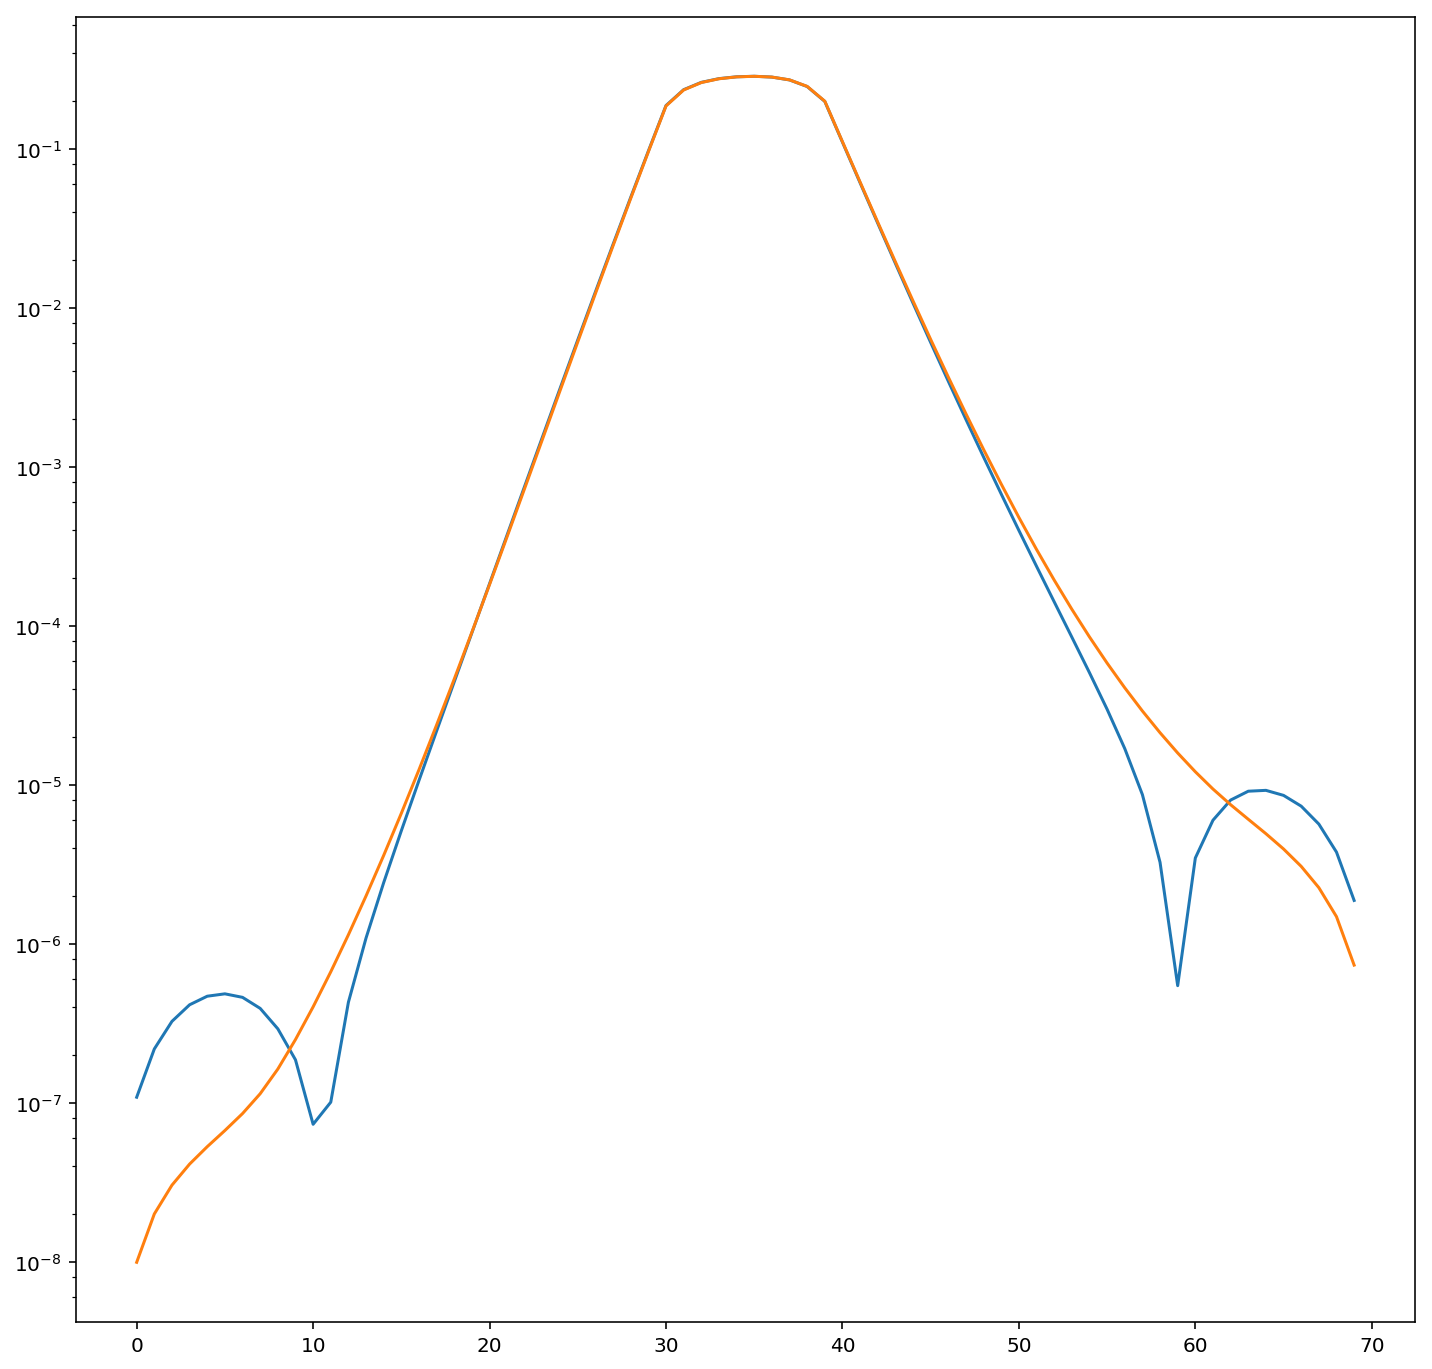

In [44]:
fig = plt.figure(figsize=(12,12));
plt.semilogy( np.abs(u)[35,:] )
plt.semilogy( np.abs(u_noterm1)[35,:] )
#plt.semilogy( np.abs(u)[:,35] )
#plt.semilogy( np.abs(u_noterm1)[:,35] )
plt.legend(loc="best")

plt.show()